In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

from tqdm import tqdm
import math

# Creating the Dataset

We will be working with a basic training dataset that has a roughly linear relationship
$$y=\beta^Tx+\epsilon$$
where $\epsilon \sim \mathcal{N}(0,0.1)$ is some gaussian noise.

For ease of plotting, we will consider the case of $x$ representing one-dimensional data, so that each element of $X$ is given by a vector $x = \begin{bmatrix} 1, x_0 \end{bmatrix}$.

In [2]:
intercept = 10
slope = 3

# beta_true is the true value of beta; we will use SGD to approximate it later
beta_true = np.array([[intercept,slope]])

X = sm.add_constant(np.random.rand(200,1)) # Get 100 random samples for the X values
y = X@np.transpose(beta_true)+np.random.normal(loc=0, scale=0.1, size=(X.shape[0], 1)) # Calculate y-values

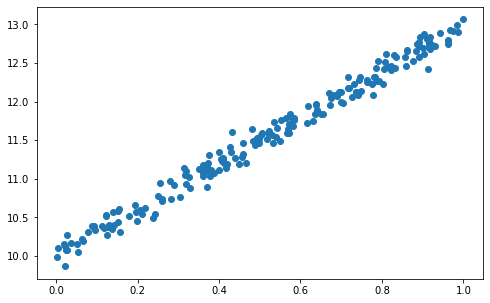

In [3]:
# Here, we plot the data generated above.

plt.figure(figsize=(8,5))
plt.scatter(X[:,1],y)
plt.show()

# Implementing SGD

We want to find $\text{argmin}_{\beta} L(\beta)$, where the loss function $L(\beta)$ is the MSE:
$$L(\beta) = \frac{1}{n} \sum_{i=1}^n(y_i - \beta^Tx_i)^2$$


To accomplish this with Gradient Descent, we use the update rule
$$\beta \leftarrow \beta - \eta \nabla_{\beta} L$$


However, computing $\nabla_\beta L$ can be very constly when the size of our dataset $X$ is large. To approximate it, we use Stochastic Gradient Descent. First, we choose some random element $x_i$ from our dataset (hence "stochastic") and consider the loss of a single sample $x_i$:
$$\hat{L}(\beta) = (y_i-\beta^Tx_i)^2$$
Taking the derivative, we see that
$$\nabla_\beta \hat{L} = -2(y_i-\beta^Tx_i)x_i$$
Hence, we use the update rule
$$\beta \leftarrow \beta+2\eta(y_i-\beta^Tx_i)x_i$$

In [4]:
def SGD(X, y, time_steps):
    beta = np.zeros(X.shape[1]) # We initialize beta

    for t in tqdm(np.arange(1,time_steps+1)):
        index = np.random.randint(0,X.shape[0]) # Select a random index

        x = X[index]
        y_true = y[index]
        y_hat = np.transpose(beta)@x # Our prediction is y_i = beta^T x_i


        eta = 1/math.sqrt(t) # Define the learning rate as 1/sqrt(t)
        g = -2*(y_true-y_hat)*x # Use our formula for the gradient, as derived earlier

        beta -= eta*g # Update beta according to our update rule
        
    return beta

Running this algorithm on our example dataset, with 1e5 timesteps yields good results:

In [5]:
beta_hat = SGD(X,y,1e5)

print("Predicted beta:", beta_hat)
print("True beta:", beta_true)

100%|████████████████████████████████| 100000/100000 [00:02<00:00, 38580.74it/s]

Predicted beta: [10.02544261  2.97018686]
True beta: [[10  3]]


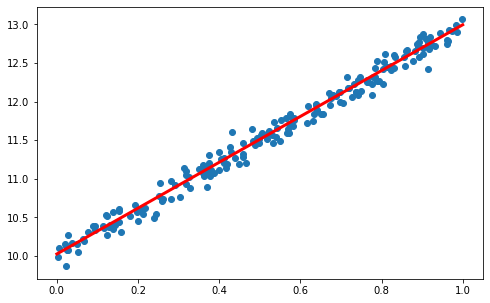

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 1],y)

domain = np.arange(np.max(X[:, 1])+0.1, step=0.1)
plt.plot(domain, beta_hat[0]+beta_hat[1]*domain, color="red", linewidth=3)
plt.show()

# Mini Batch Gradient Descent

In [7]:
def Mini_Batch_GD(X, y, batch_size, time_steps):
    beta = np.zeros(X.shape[1]) # We initialize beta

    time_steps = np.arange(1,time_steps+1)
    for t in tqdm(time_steps):
        selected = np.random.randint(low=0,high=X.shape[0],size=batch_size)

        x = X[selected]
        y_true = y[selected]
        y_hat = np.dot(x, beta).reshape(batch_size,1)

        eta = 1/math.sqrt(t)
        g = np.mean(2*(y_true-y_hat)*(-x), axis=0, keepdims=False)

        beta -= eta*g
        
    return beta

In [8]:
beta_hat = Mini_Batch_GD(X,y,batch_size=20, time_steps=1e5)

print("Predicted beta:", beta_hat)
print("True beta:", beta_true)

100%|████████████████████████████████| 100000/100000 [00:07<00:00, 14041.19it/s]

Predicted beta: [10.01926056  2.96153922]
True beta: [[10  3]]


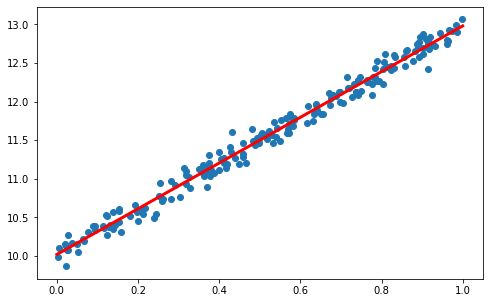

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 1],y)

domain = np.arange(np.max(X[:, 1])+0.1, step=0.1)
plt.plot(domain, beta_hat[0]+beta_hat[1]*domain, color="red", linewidth=3)
plt.show()